Without Feature Selection:
Random Forest - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000


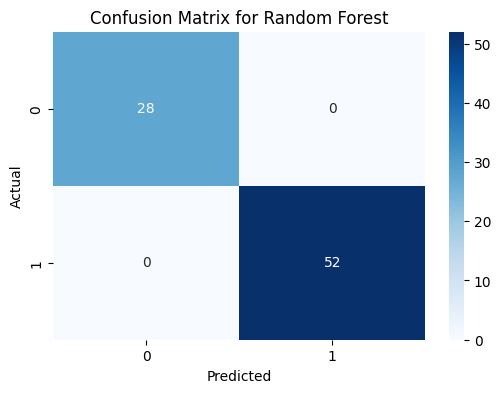

Without Feature Selection:
Decision Tree - Accuracy: 0.9875, Precision: 1.0000, Recall: 0.9808, F1 Score: 0.9903


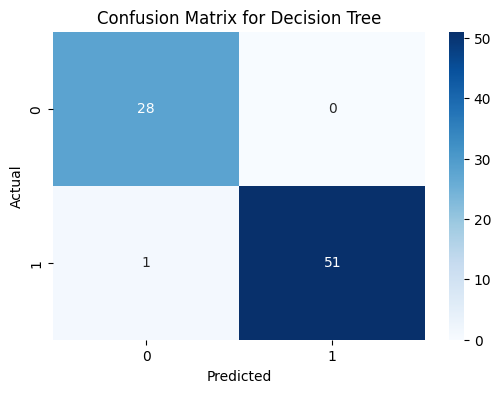

Without Feature Selection:
KNN - Accuracy: 0.9625, Precision: 1.0000, Recall: 0.9423, F1 Score: 0.9703


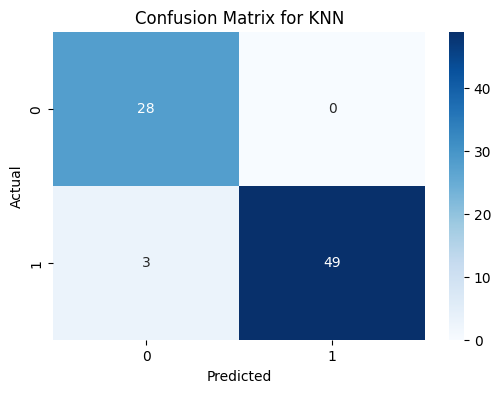

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 22  23  28  64  75  76  80  81  82  98 101 103 130 163 209] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw



With Feature Selection:
Random Forest - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000


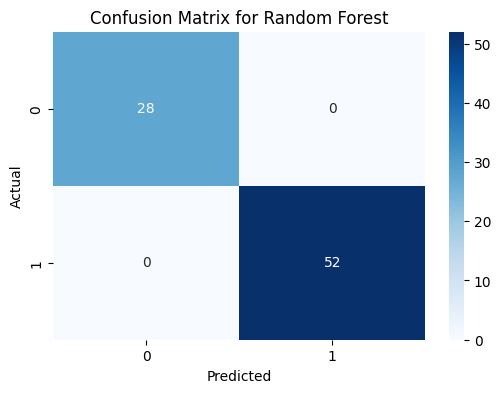


With Feature Selection:
Decision Tree - Accuracy: 0.9875, Precision: 1.0000, Recall: 0.9808, F1 Score: 0.9903


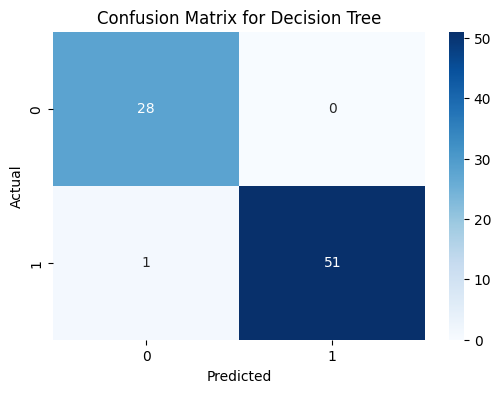


With Feature Selection:
KNN - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000


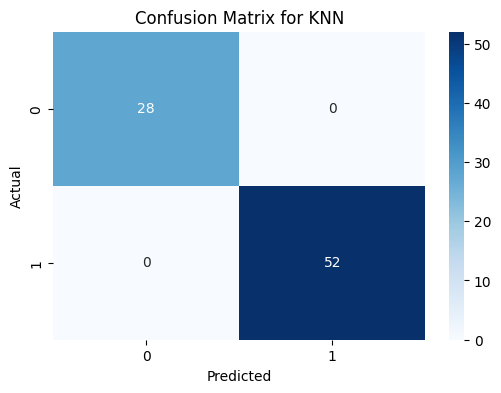

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('kidney_disease.csv')

# Preprocessing
# Assume target variable is 'classification' and it's binary (1 for disease, 0 for no disease)
df['classification'] = df['classification'].apply(lambda x: 1 if x == 'ckd' else 0)

# Handle missing values
# Fill numeric columns with their mean
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill non-numeric columns with their mode
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns
df[non_numeric_cols] = df[non_numeric_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Convert non-numeric columns to numeric using one-hot encoding
df = pd.get_dummies(df)

# Features and target
X = df.drop('classification', axis=1)
y = df['classification']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to evaluate the models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    return accuracy, precision, recall, f1, cm

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Models
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier()
}

# Evaluate models without feature selection
#print("Without Feature Selection:")
for name, model in models.items():
    print("Without Feature Selection:")
    accuracy, precision, recall, f1, cm = evaluate_model(model, X_train, X_test, y_train, y_test)
    print(f"{name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    plot_confusion_matrix(cm, name)

# Feature selection using ANOVA
selector = SelectKBest(f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Evaluate models with feature selection
#print("\nWith Feature Selection:")
for name, model in models.items():
    print("\nWith Feature Selection:")
    accuracy, precision, recall, f1, cm = evaluate_model(model, X_train_selected, X_test_selected, y_train, y_test)
    print(f"{name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    plot_confusion_matrix(cm, name)
